<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data Analytics 

### Confidence Intervals and Hypothesis Testing for Data Analytics in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

##### Reporting Uncertainty and Significance

With confidence intervals and hypothesis testing we have the opportunity to report uncertainty and to report significance in our statistics. These methods are based on standard methods with their associated limitations and assumptions. For additional learning content to support learning about confidence intervals see [Confidence Intervals Lecture](https://youtu.be/oaXCcTWcU04) for more details and the [Confidence Intervals Interactive Demonstration](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/Interactive_Confidence_Interval.ipynb) to play with and observe confidence intervals in real-time! For more information about hypothesis testing see [Hypothesis Testing Lecture](https://youtu.be/rvt9UM148tQ) and [Hypothesis Testing Interactive Demonstration](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/Interactive_Hypothesis_Testing.ipynb).

Also, for more information about statistical bootstrap see the [Bootstrap Lecture](https://youtu.be/oaXCcTWcU04) and [Bootstrap Workflow](https://git.io/fhgUW) for a general, empirical approach to assess uncertainty in statistics and models and [Bootstrap Interactive Demonstration](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/Interactive_Bootstrap_Simple.ipynb).

This is a tutorial / demonstration of **Confidence Intervals and Hypothesis Testing in Python** for data analytics and data science workflows.  In Python, the SciPy package, specifically the [SciPy Stats Functions](https://docs.scipy.org/doc/scipy/reference/stats.html) provides excellent statistics tools. 

##### More Comfortable in Excel or R?

I have previously provided these examples worked out by-hand in [Excel](https://github.com/GeostatsGuy/LectureExercises/blob/master/Lecture7_CI_Hypoth_eg_R.xlsx) and also in [R](https://github.com/GeostatsGuy/LectureExercises/blob/master/Lecture7_CI_Hypoth_eg.R).  In all cases, I use the same [dataset](https://git.io/fxLAt) available as a comma delimited file in my [GeoDataSets](https://github.com/GeostatsGuy/GeoDataSets) repository. Feel free to compare the workflows and results as a bridge to working in Python.  

##### Topics Covered

This tutorial, well-documented workflow, includes basic, typical confidence interval and hypothesis testing methods that would commonly be required for Engineers and Geoscientists including:

1. Student-t confidence interval for the mean
2. Student-t hypothesis test for difference in means (pooled variance)
3. Student-t hypothesis test for difference in means (difference variances), Welch's t Test
3. F-distribution hypothesis test for difference in variances 

#### Workflow Goal

0. Introduction to Python in Jupyter including setting a working directory, loading data into a Pandas DataFrame.
1. Learn the basics for working with confidence intervals and hypothesis testing in Python.  
2. Demonstrate the efficiency of using Python and SciPy package for statistical analysis.
3. Learn how to quantify uncertainty and significance in samples.

#### Objective 

I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of data science modeling workflow construction by providing building blocks and sufficient examples. My courses are not a coding classes per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - PorositySample2Units.csv at https://git.io/fhrM8

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python     

We will also need some standard packages. These should have been installed with Anaconda 3.

In [5]:
import os                                              # to set current working directory 
import numpy as np                                     # arrays and matrix math
import scipy.stats as st                               # statistical methods
import pandas as pd                                    # DataFrames
import matplotlib.pyplot as plt                        # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                         # set axes and grids in the background for all plots

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  



#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this directory.  When we are done with this tutorial we will write our new dataset back to this directory.  

In [3]:
#os.chdir("C:\PGE383")                                  # set the working directory

#### Loading Data

Let's load the provided dataset. 'PorositySamples2Units.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [4]:
#df = pd.read_csv("PorositySample2Units.csv")           # read a .csv file in as a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorositySample2Units.csv") # load data from Dr.Pyrcz's GitHub repository
#print(df.iloc[0:5,:])                                 # display first 4 samples in the table as a preview
df.head()                                              # we could also use this command for a table preview 

,X1,X2
0,0.21,0.20
1,0.17,0.26
2,0.15,0.20
3,0.20,0.19
4,0.19,0.13


#### Checking Data Summary Statistics

It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [7]:
df.describe().transpose()                              # visualize summary statistics 

,count,mean,std,min,25%,50%,75%,max
X1,20.0,0.1645,0.027810,0.11,0.1500,0.17,0.19,0.21
X2,20.0,0.2000,0.045422,0.11,0.1675,0.20,0.23,0.30


Here we extract the X1 and X2 unit porosity samples from the DataFrame into separate arrays called 'Por1' and 'Por2' for convenience.

In [8]:
por1 = df['X1'].values                                 # extract well 1 porosity to a ndarray
por2 = df['X2'].values                                 # extract well 2 porosity to a ndarray          

#### Visualizing the Data Distributions

We should first visualize the distributions.  It is convenient to plot the distributions on top of each other.  

* we compare the histograms and cumulative distribution functions (CDFs)

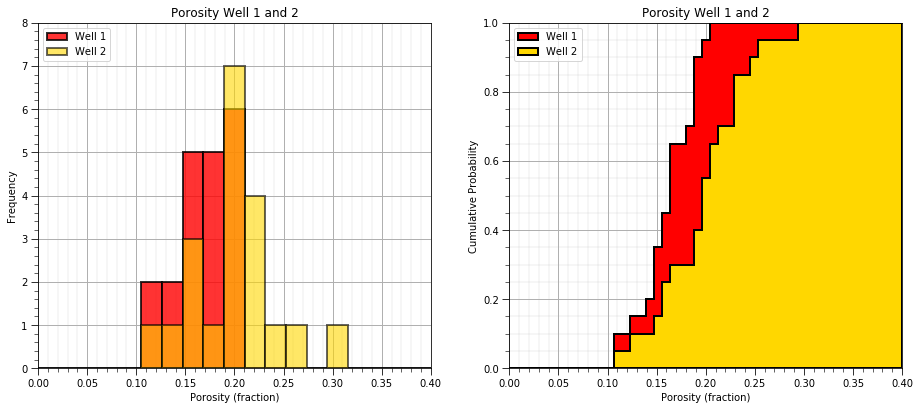

In [38]:
plt.subplot(121)
plt.hist(por1, facecolor='red',bins=np.linspace(0.0,0.4,20),alpha=0.8,density=False,edgecolor='black',linewidth=2,label='Well 1')
plt.hist(por2, facecolor='gold',bins=np.linspace(0.0,0.4,20),alpha=0.6,density=False,edgecolor='black',linewidth=2,label = 'Well 2')
plt.xlim([0.0,0.4]); plt.ylim([0,8.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Well 1 and 2')
plt.legend(loc='upper left')
plt.gca().grid(True, which='major',axis='both',linewidth = 1.0); plt.gca().grid(True, which='minor',axis='x',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

plt.subplot(122)
plt.hist(por1, facecolor='red',bins=np.linspace(0.0,0.4,50),histtype="stepfilled",alpha=1.0,density=True,cumulative=True,edgecolor='black',linewidth=2,label='Well 1')
plt.hist(por2, facecolor='gold',bins=np.linspace(0.0,0.4,50),histtype="stepfilled",alpha=1.0,density=True,cumulative=True,edgecolor='black',linewidth=2,label='Well 2')
plt.xlim([0.0,0.4]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Cumulative Probability'); plt.title('Porosity Well 1 and 2')
plt.legend(loc='upper left')
plt.grid(True, which='major',linewidth = 1.0); plt.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

The histogram and cumulative distribution functions indicate the porosity distributions in both wells 1 and 2. Ocular inspection does indicate: 

1. not a lot of samples are available for each (n=20) 
2. the distributions look different

Let's use statistics to learn more about the subsurface from these two wells.

#### Confidence Intervals

Let's first demonstrate the calculation of the confidence interval for the sample mean at a 95% confidence level.  We interpret the confidence interval as the interval over which there is a 95% confidence that it contains the true population mean. We use the student's t distribution as we assume we do not know the variance and the sample size is small. 

\begin{equation}
x̅ \pm t_{\frac{\alpha}{2},n-1} \times \frac {s}{\sqrt{n}} 
\end{equation}

In [39]:
ci_95_por1 = st.t.interval(0.95, len(df)-1, loc=np.mean(por1), scale=st.sem(por1))
print('The confidence interval for the Well 1 mean porosity is ' + str(round(np.mean(por1),3)) + ' +/- ' + str(round(ci_95_por1[1]-np.mean(por1),3))
      + ', with a range of ' + str(round(ci_95_por1[0],3)) + ', ' + str(round(ci_95_por1[1],3)))

ci_95_por2 = st.t.interval(0.95, len(df)-1, loc=np.mean(por2), scale=st.sem(por2))
print('The confidence interval for the Well 2 mean porosity is ' + str(round(np.mean(por2),3)) + ' +/- ' + str(round(ci_95_por2[1]-np.mean(por2),3))
      + ', with a range of ' + str(round(ci_95_por2[0],3)) + ', ' + str(round(ci_95_por2[1],3)))

The confidence interval for the Well 1 mean porosity is 0.164 +/- 0.013, with a range of 0.151, 0.178
The confidence interval for the Well 2 mean porosity is 0.2 +/- 0.021, with a range of 0.179, 0.221


#### Using Confidence Intervals to Build an Uncertainty Model

The confidence interval for the mean could be applied directly as an uncertainty model! The uncertainty in mean porosity at each well could be applied to calculate the uncertainty in the mean porosity applied to model porosity around the two wells. This method would account for the limited number of porosity samples available. If more porosity samples we available then this uncertainty would decrease (note the $\sqrt{n}$ in the denominator of the confidence interval in the mean calculation above.

One possible work flow would be to apply the affine correction from the *GeostatsPy* package to formulate a the P5 and P95 porosity distributions for porosity in each well. Note, these distribution scenarios are based only on uncertainty in the mean porosity and assumes the distribution tails are not anchored (are free to shift).

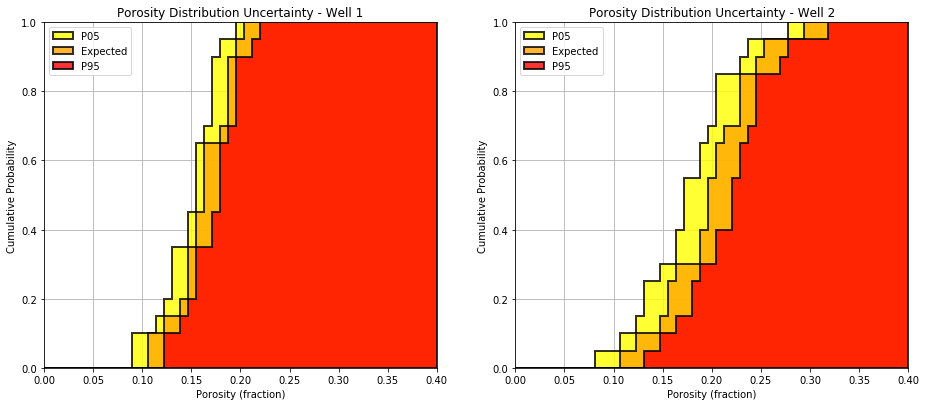

In [40]:
stdev1 = np.std(por1); stdev2 = np.std(por2)
por1r05 = GSLIB.affine(por1,tmean=ci_95_por1[0],tstdev=stdev1)
por1r95 = GSLIB.affine(por1,tmean=ci_95_por1[1],tstdev=stdev1)
por2r05 = GSLIB.affine(por2,tmean=ci_95_por2[0],tstdev=stdev2)
por2r95 = GSLIB.affine(por2,tmean=ci_95_por2[1],tstdev=stdev2)

plt.subplot(121)
plt.hist(por1r05, facecolor='yellow',bins=np.linspace(0.0,0.4,50),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',linewidth=2,label='P05')
plt.hist(por1, facecolor='orange',bins=np.linspace(0.0,0.4,50),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',linewidth=2,label='Expected')
plt.hist(por1r95, facecolor='red',bins=np.linspace(0.0,0.4,50),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',linewidth=2,label='P95')

plt.xlim([0.0,0.4]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Cumulative Probability'); plt.title('Porosity Distribution Uncertainty - Well 1')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)
plt.hist(por2r05, facecolor='yellow',bins=np.linspace(0.0,0.4,50),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',linewidth=2,label='P05')
plt.hist(por2, facecolor='orange',bins=np.linspace(0.0,0.4,50),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',linewidth=2,label='Expected')
plt.hist(por2r95, facecolor='red',bins=np.linspace(0.0,0.4,50),histtype="stepfilled",alpha=0.8,density=True,cumulative=True,edgecolor='black',linewidth=2,label='P95')

plt.xlim([0.0,0.4]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Cumulative Probability'); plt.title('Porosity Distribution Uncertainty - Well 2')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

We just calculated a scenario-based uncertainty model for the porosity distribution around wells 1 and 2. Of course, we could actually sample porosity means continuously from our confidence calculation as we have access to the complete distribution for uncertainty in the mean porosity of both wells.

Communicating uncertainty is powerful, but always remember to state the assumptions. For example, here we assumed:

1. The population distribution of porosity for each well is Gaussian distributed
2. That the samples are independent.
3. The distribuiton dispersion and shape don't change as we vary the (account for uncertainty in the) mean.

One can check the Excel file linked above with the confidence interval calculated by hand and confirm that this result is correct.

#### Hypothesis Testing

The confidence intervals help with uncertainty in the distributions of porosity.  Now let's try to figure out if:

1. wells 1 and 2 drilled into the same type of rock? 
2. did something change between the 2 wells? 
3. different units are being compared between the 2 wells (issues with stratal correlation)?

Now, let's try the t test, hypothesis test for difference in means.  This test assumes that the variances are similar along with the data being Gaussian distributed (see the course notes for more on this).  This is our test:

\begin{equation}
H_0: \mu_{X1} = \mu_{X2}
\end{equation}

\begin{equation}
H_1: \mu_{X1} \ne \mu_{X2}
\end{equation}

For the resulting t-statistic and p-value we run this command.

In [41]:
t_pooled, p_pooled = st.ttest_ind(por1,por2)
print('The t statistic is ' + str(round(t_pooled,3)) + ' and the p-value is ' + str(round(p_pooled,3)))

The t statistic is -2.981 and the p-value is 0.005


The p-value, $p$, is the symmetric interval probaiblity our outside.  In other words the $p$ reported is 2 x cumulative probaiblity of the t statistic applied to the sampling t distribution.  Another way to look at it, if one used the $\pm t_{t_{statistic},.d.f}$ statistic as thresholds, $p$ is the probability being outside this symmetric interval. So we will reject the null hypothesis if $p \lt \alpha$.  From the p-value alone it is clear that we would **reject the null hypothesis** and **accept the alternative hypothesis** that the means are not equal.  

In case you want to compare the t-statistic to t-critical, we can apply the inverse of the student's t distribution at $\frac{\alpha}{2}$ and $1-\frac{\alpha}{2}$ to get the upper and lower critcal values.       

In [42]:
t_critical = st.t.ppf([0.025,0.975], df=len(por1)+len(por2)-2)
print('The t crical lower and upper values are ' + str(np.round(t_critical,2)))

The t crical lower and upper values are [-2.02  2.02]


We can observe that, as expected, the t-statistic is outside the t-critcal interval.  These results are exactly what we got when we worked out the problem by hand in Excel, but so much more efficient!  

Now let's try the t-test, hypothesis test for difference in means allowing for unequal variances, this is also known as the Welch's t test.  All we have to do is set the parameter 'equal_var' to false, note it defaults to true (e.g. the command above). 

In [43]:
st.ttest_ind(por1, por2, equal_var = False)

Ttest_indResult(statistic=-2.9808897468855644, pvalue=0.005502572350112333)

Once again we can see by $p$ that we will clearly reject the null hypothesis.  

Let's now compare the variances with the F-test for difference in variances.  

\begin{equation}
H_0: \sigma^{2}_{X2} \le \sigma^{2}_{X1}
\end{equation}

\begin{equation}
H_1: \sigma^{2}_{X2} \gt \sigma^{2}_{X1}
\end{equation}

Note, by ordering the variances we eliminate the case of $\sigma^{2}_{X2} \lt \sigma^{2}_{X1}$.

Details about the test are available in the course notes (along with assumptions such as Gaussian distributed) and this example is also worked out by hand in the linked Excel workbook.  We can accomplish the F-test in with SciPy.Stats the function with one line of code if we calculate the ratio of the sample variances ensuring that the larger variance is in the numerator and get the degrees of freedom using the len() command, ensuring that we are consistent with the numerator degrees of freedom set as 'dfn' and the denominator degrees of freedom set as 'dfd'.  We take a p-value of $1-p$ since the test is configured to be a single, right tailed test.    

In [44]:
p_value = 1 - st.f.cdf(np.var(por2)/np.var(por1), dfn=len(por2)-1, dfd=len(por1)-1)
print('The p-value for the F-test for difference is variances is ' + str(round(p_value,3)))

The p-value for the F-test for difference is variances is 0.019


Once again we would clearly reject the null hypothesis since $p \lt alpha$ and assume that the variances are not equal.  Note this is a single tail test so our p-critical is 0.05 for a 95% confidence level.

#### Reporting the Hypothesis Test Results

The difference in the means and variances were tested for statistical significance for porosity measured in wells 1 and 2.  In all cases we rejected the null hypotheses and adopted the alternative hypotheses that the porosity distributions' means and variances for well 1 and 2 are statistically significant in their differences. It is possible that Well 1 and 2 have drilled into different rock units or have encountered nonstationary behavoirs in a single rock unit. This result may be applied to update subsurface maps and consider a difference in the subsurface at each well for development decision making.

#### Comments

We are just scratching the surface for the application of confidence intervals and hypothesis tests to subsurface modeling.  Once again, there are a lot of details left out of the problem formulation and assumptions, see the course notes for more coverage.  By running the same confidence interval and hypothesis tests: 1) by hand in Excel and with 2) R and now here in 3) Python code, I hope this demonstration will enable and encourage more engineers and scientists to make these R and Python tools part of their common practice. I'm always happy to discuss,

I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
